# The Lempel-Ziv or Ziv-lempel, or, even the LZ compression

<!-- PELICAN_BEGIN_SUMMARY -->

Between a couple of years, from 1976 to 1978, Abraham Lempel and Jacob Ziv created a procedure, and several variants of it, aiming the compression of data. Its latter proposed variants turnout to be a very effective procedure to compress many type of datas, including text and images (used in the GIF format). The fact that no prior information about the data distribution was required in advance (constrain imposed by statistical compression methods) and the simplistic but powerfull algorithm were two facts contributing to the popularity of the LZ compression method.

Since it's creation, the LZ algorithms have been widely used but in many occasions there's a confusion between which algorithm correspond each variant. Furthermore, the increasing in the amount of data produced have pushed the initial LZ algorithms to be augumented with new data structures in order to become feasible for the analysis of big datasets. Specially for big texts, like human genome that has more than 3 billions ($10^9$) base pairs.

In this post, I plan to cover the whys and whichs of the lempel-ziv algorithms called LZ76, LZ77 and LZ78. 

<!-- PELICAN_END_SUMMARY -->

Statistical compression does not capture repetitiveness.

# LZ78

The lempel-zip compression algorithm proposed in 1978, also called LZ78, processes a text $T[1,n]$ from left to right and cuts it into $z$ substrings, called _phrases_. Navarro, in Compact Data Structures book, defined the algorithm in plain english in a simple way:

> "As the text is parsed, each new phrase is extended as much as possible to the right as long as it matches **some previous phrase**, and then next the new character (the mismatched one) is also included."

This whole process is called the parsing of $T$. A trie is a data structure that can be used to store the parsing results. Basically, a trie is a tree that holds every suffix of a word/text. To spell the suffix from a trie, we traverse it from the root to a leaf outputting the label in the edges found in the path. A trie is usefull in string matching because when comparing a word of size $m$ with a text of size $n$ in the "brute force" way we must perform $m*n$ comparisons, while with the aid of the trie the number of comparisons is the size of the word to be mathed ($m$). If you want to learn more about tries in the context of string matching watch the excelent lecture from Ben Langmead. In fact, I'll use his code as base to the LZ78 python implementation parser.

Be aware that the trie used in LZ78 implementation will not hold every suffix but a phrase for each path begining at a root and ending at a leaf. 

The example 8.28 from Navarro`s CDS is reproduced bellow to show the LZ78 parsing of the text  how_can_a_clam_cram_in_a_clean_cream_can. The parsing is carried out as follows. 

In [10]:
class LZ78Trie(object):
  
  def __init__(self, t):
    t += '$'
    self.root = {}
    i = 0
    while i < len(t):
      cur = self.root
      j = 1
      for c in t[i:]:
        if c not in cur:
          cur[c] = {}
          i += 1
          break
        cur = cur[c]
        i += 1
        

  def followPath(object, s):
    cur = self.root
    for c in s:
      if c not in cur:
        return None
      cur = cur[c]
    return cur
  
  
  def has_substring(self, s):
    """ Return true if s appears as a substring of t """
    return self.follow_path(s) is not None
  
  
  def to_dot(self):
    """ Return dot representation of trie to make a picture """
    lines = []
    def _to_dot_helper(node, parid):
        childid = parid
        for c, child in node.items():
            lines.append('  %d -> %d [ label="%s" ];' % (parid, childid+1, c))
            childid = _to_dot_helper(child, childid+1)
        return childid
    lines.append('digraph "Suffix trie" {')
    lines.append('  node [shape=circle label=""];')
    _to_dot_helper(self.root, 0)
    lines.append('}')
    return '\n'.join(lines) + '\n'

In [11]:
! wget https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py

--2019-10-14 15:37:09--  https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py
Resolving raw.github.com... 151.101.92.133
Connecting to raw.github.com|151.101.92.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/cjdrake/ipython-magic/master/gvmagic.py [following]
--2019-10-14 15:37:09--  https://raw.githubusercontent.com/cjdrake/ipython-magic/master/gvmagic.py
Resolving raw.githubusercontent.com... 151.101.92.133
Connecting to raw.githubusercontent.com|151.101.92.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4988 (4.9K) [text/plain]
Saving to: ‘gvmagic.py.2’

gvmagic.py.2        100%[===================>]   4.87K  --.-KB/s    in 0.001s  

2019-10-14 15:37:10 (5.27 MB/s) - ‘gvmagic.py.2’ saved [4988/4988]



In [18]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


In [19]:
%dotstr LZ78Trie("how_can_a_clam_cram_in_a_clean_cream_can").to_dot()

It cannot produce less than $\sqrt{n}$ phrases, even in the text $T=a^n\$$. Why ??

## LZ76

The Lempel-Ziv 1976 compression is somehow similar to LZ78, in which the text is parsed into a sequence of phrases. While in LZ78 the next phrase to be find after parsing $T[1,i]$ must be a previous found phrase plus the symbol following it, in LZ76 the phrase is the longest prefix of $T[i+1,n]$ that has already appeared in the text plus the symbol following it. If the next phrase foud is $T[i+1,j] = T[i',j'].T[j]$, the LZ76 compression algorithm encodes the phrase as the triple $(i´,j-i-1,T[j])$.

Often LZ76 is mistaken with LZ77, a variant that restricts the length $l$ of the sliding window $T[i-l,i]$ from where the phrases can be detected. This constraint simplifies the finding and enconding the phrases and has the drawback to restrict the search to "nearby" regions in the text.

**Lemma:** The z distinct phrases that LZ compression algorithms generate have $O(n/log_{\sigma}n)$.

_Proof:_ Let $\sigma$ be the length of the alphabet used. Listing all the distict phrases in sorted order of length we'll have:
- $\sigma$ phrases of length 1;
- $\sigma^2$ phases of length 2;
- $\sigma^3$ phrases of length 3;
- and so on;
TO BE CONTINUED

The LZ76 phrases can be found in linear time with the help of a suffix tree (Rodeh et al, 1981), but this structure requires a lot of extra space, which hampers the parsing of large texts. 

### The suffix tree data structure


Naive methods to build a suffix tree:

1. Build the ST from the suffix trie data structure. This method takes $O(m^2)$ time and $O(m^2)$ space.

2. Recursively augment the tree starting from a two-edge tree representing the longest suffix. Then, insert the 2nd longest suffix. Then, the 3rd longest suffix. And so on. It takes $O(m)$ space but still $O(m^2)$ time (Gusfield, section 5.4).

The suffix tree implementation below was borrowed from [Ben Langmead teaching materials](http://www.langmead-lab.org/teaching-materials/) (which I highly recommend) and follows the Gusfield algorithm presented in section 5.4. I slightly modified the implementation to accomodate the $m$ suffix numbers in the nodes, where $m$ is the number of suffixes from text $T$. This number will be important in the implementation of the LZ76 parser using suffix trees.


In [0]:
class SuffixTree(object):
  class Node(object):
    def __init__(self, lab, idx):
      self.lab = lab # label on path leading to this node
      self.out = {}  # outgoing edges; maps characters to nodes
      self.idx = idx
      
  def __init__(self, s):
    s += '$'
    self.root = self.Node(None, None)
    self.root.out[s[0]] = self.Node(s, 0) # trie for just longest suffix
    # add the rest of the suffixes, from longest to shortest
    for i in range(1, len(s)):
      # start at root; we'll walking down as far as we can go
      cur = self.root
      j = i
      while j < len(s):
        if s[j] in cur.out:
          child = cur.out[s[j]]
          lab = child.lab
          # walk along edge until we exhaust edge label or until we mismatch
          k = j+1
          while k-j < len(lab) and s[k] == lab[k-j]:
            k += 1
          if k-j == len(lab):
            cur = child # we exhausted the edge
            j = k
          else:
            # we fell off in middle of edge
            cExist, cNew = lab[k-j], s[k]
            # create "mid": new node bisecting edge
            mid = self.Node(lab[:k-j], None)
            mid.out[cNew] = self.Node(s[k:], i)
            # original child becomes mid's child
            mid.out[cExist] = child
            # original child's label is curtailed
            child.lab = lab[k-j:]
            # mid becomes new child of original parent
            cur.out[s[j]] = mid
        else:
          # Fell off tree at a node: make new edge hanging off it
          cur.out[s[j]] = self.Node(s[j:],i)

  def followPath(self, s):
    """ Follow path given by s.  If we fall off tree, return None.  If we
        finish mid-edge, return (node, offset) where 'node' is child and
        'offset' is label offset.  If we finish on a node, return (node,
        None). """
    cur = self.root
    i = 0
    while i < len(s):
        c = s[i]
        if c not in cur.out:
            return (None, None) # fell off at a node
        child = cur.out[s[i]]
        lab = child.lab
        j = i+1
        while j-i < len(lab) and j < len(s) and s[j] == lab[j-i]:
            j += 1
        if j-i == len(lab):
            cur = child # exhausted edge
            i = j
        elif j == len(s):
            return (child, j-i) # exhausted query string in middle of edge
        else:
            return (None, None) # fell off in the middle of the edge
    return (cur, None) # exhausted query string at internal node

  def hasSubstring(self, s):
      """ Return true iff s appears as a substring """
      node, off = self.followPath(s)
      return node is not None

  def hasSuffix(self, s):
      """ Return true iff s is a suffix """
      node, off = self.followPath(s)
      if node is None:
          return False # fell off the tree
      if off is None:
          # finished on top of a node
          return '$' in node.out
      else:
          # finished at offset 'off' within an edge leading to 'node'
          return node.lab[off] == '$'

  def _iterate_over_nodes(self):
    def _to_iter(node):
        for c, child in node.out.items():
          print("Node lab={}, id={}".format(child.lab, child.idx))
          _to_iter(child)
    _to_iter(self.root)
  
  def numerate_internal_nodes(self):
    def preorder_traversal(root):
      yield root
      for c, child in root.out.items():
        yield from preorder_traversal(child)
    return preorder_traversal(self.root)
    
  def to_dot(self):
      """ Return dot representation of trie to make a picture """
      lines = []
      def _to_dot_helper(node, parid):
          childid = parid
          for c, child in node.out.items():
#              print(c, child)
              lines.append('  %d -> %d [ label="%s" ];' % 
                           (parid, childid+1, child.lab))
              if child.idx is not None:
                lines.append('  {} [label="{}"];'.format(childid+1, child.idx))
              childid = _to_dot_helper(child, childid+1)
          return childid
      lines.append('digraph "Suffix trie" {')
      lines.append('  node [shape=circle label=""];')
      _to_dot_helper(self.root, 0)
      lines.append('}')
      return '\n'.join(lines) + '\n'

The example shown by Langsmead in his lecture about suffix trees is reproduced below, i.e. $T=abaaba$. The leaf nodes were labeled with the corresponding suffix number. Internal nodes dont have labels.

In [0]:
stree = SuffixTree('abaaba')

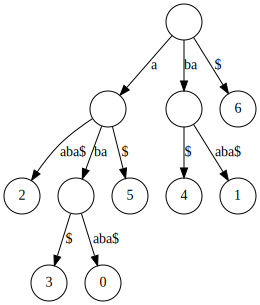

In [7]:
%dotstr stree.to_dot()

Now that we have a suffix tree implementation we can go back to LZ76 parsing algorithm. 

# Naive LZ76 parsing algorithm

The algorithm relies on the suffix tree (ST) for string $T$ to find longest prefix of $T[i,n]$. 

1. Build an ST for string $T$;

2. Number each internal node $v$ with $c_v$, the smallest number of all the suffixes in $v$´s subtree; this way, $c_v$ is the left most position in $T$ of any copy of the substring on the path from root to node $v$;

3. To obtain the encoding (position, length) for the substring $T[i, n]$, whith $0 \leq i \leq n$, do:

  a. Follow the only path from the root that matches the prefix $T[i, n]$;

  b. The traversal stops at point $p$ which not necessarily is a node, when a character breaks the match; let depth(p) be the length of the string from the root to p and v the first node at of below p;

  c. Do position <- $c_v$ and length <- depth(p);

  d. Output encoding (position, length, S[j]), with $j=i+length$;

  e. Do i <- j+1; if i = n stop; else goto 3.

1. Build an ST for string $T$;

2. Number each internal node $v$ with $c_v$, the smallest number of all the suffixes in $v$´s subtree; this way, $c_v$ is the left most position in $T$ of any copy of the substring on the path from root to node $v$;

3. To obtain the encoding (position, length) for the substring $T[i, n]$, whith $0 \leq i \leq n$, do:

  a. Follow the only path from the root that matches the prefix $T[i, n]$;

  b. The traversal stops at point $p$ which not necessarily is a node, when a character breaks the match; let depth(p) be the length of the string from the root to p and v the first node at of below p;

  c. Do position <- $c_v$ and length <- depth(p);

  d. Output encoding (position, length, S[j]), with $j=i+length$;

  e. Do i <- j+1; if i = n stop; else goto 3.

In [0]:
from collections import defaultdict

class SuffixTreeLZ76(object):
  class Node(object):
    def __init__(self, lab, idx):
      self.lab = lab # label on path leading to this node
      self.out = {}  # outgoing edges; maps characters to nodes
      self.idx = idx
      
    #def __hash__(self):
    #    return hash((self.lab, self.out, self.idx))

    #def __eq__(self, other):
    #    if not isinstance(other, type(self)): return NotImplemented
    #    return self.lab == other.lab and self.out == other.out and self.idx == other.idx
      
  def __init__(self, s):
    s += '$'
    self.root = self.Node(None, None)
    self.root.out[s[0]] = self.Node(s, 0) # trie for just longest suffix
    # add the rest of the suffixes, from longest to shortest
    for i in range(1, len(s)):
      # start at root; we'll walking down as far as we can go
      cur = self.root
      j = i
      while j < len(s):
        if s[j] in cur.out:
          child = cur.out[s[j]]
          lab = child.lab
          # walk along edge until we exhaust edge label or until we mismatch
          k = j+1
          while k-j < len(lab) and s[k] == lab[k-j]:
            k += 1
          if k-j == len(lab):
            cur = child # we exhausted the edge
            j = k
          else:
            # we fell off in middle of edge
            cExist, cNew = lab[k-j], s[k]
            # create "mid": new node bisecting edge
            mid = self.Node(lab[:k-j], None)
            mid.out[cNew] = self.Node(s[k:], i)
            # original child becomes mid's child
            mid.out[cExist] = child
            # original child's label is curtailed
            child.lab = lab[k-j:]
            # mid becomes new child of original parent
            cur.out[s[j]] = mid
        else:
          # Fell off tree at a node: make new edge hanging off it
          cur.out[s[j]] = self.Node(s[j:],i)

  def followPath(self, s):
    """ Follow path given by s.  If we fall off tree, return None.  If we
        finish mid-edge, return (node, offset) where 'node' is child and
        'offset' is label offset.  If we finish on a node, return (node,
        None). """
    cur = self.root
    i = 0
    while i < len(s):
        c = s[i]
        if c not in cur.out:
            return (None, None) # fell off at a node
        child = cur.out[s[i]]
        lab = child.lab
        j = i+1
        while j-i < len(lab) and j < len(s) and s[j] == lab[j-i]:
            j += 1
        if j-i == len(lab):
            cur = child # exhausted edge
            i = j
        elif j == len(s):
            return (child, j-i) # exhausted query string in middle of edge
        else:
            return (None, None) # fell off in the middle of the edge
    return (cur, None) # exhausted query string at internal node

  def followPathMod(self, s):
    """ Follow path given by s.  If we fall off tree, return None.  If we
        finish mid-edge, return (node, offset) where 'node' is child and
        'offset' is label offset.  If we finish on a node, return (node,
        None). """
    cur = self.root
    i = 0
    parent = None # the root not doesnt have parent node
    cvs = []
    path_labs = defaultdict(list)
    while i < len(s):
        c = s[i]
        if c not in cur.out:
            return (None, None) # fell off at a node
        child = cur.out[s[i]]
        lab = child.lab
        idx = child.idx
        cvs.append(idx)
        path_labs[idx].append(lab)
        j = i+1
        while j-i < len(lab) and j < len(s) and s[j] == lab[j-i]:
            j += 1
        if j-i == len(lab):
            parent = cur
            cur = child # exhausted edge
            i = j
        elif j == len(s):
            return (cur, j-i, path_labs) # exhausted query string in middle of edge
        else:
            return (None, None, path_labs) # fell off in the middle of the edge
    return (parent, None, path_labs) # exhausted query string at internal node
  
  def LZ76encoder(self, t):
    """ Performing the LZ76 parsing of T[1,n]. Outputs the $z$ of the
     LZ76 parsing of T.
    """
    i = 0
    phrases = []
    while i < len(t):
      if i == 0:
        phrases.append(t[0])
        i+=1
      else:  
        right_substring = t[i:2*i]
        node_end, offset, lcvs = self.followPathMod(right_substring)
        #print("i=",i, right_substring, node_end.idx, lcvs)
        if len(lcvs) == 1 and list(lcvs.keys())[0] == i:
   #       print(t[i])
          phrases.append(t[i])
          i += 1
        else:
          repi = ''.join(lcvs[min(lcvs)])
          li = len(repi)
          if li >= i:
           # print("Here")
           # print("First",i, repi, li)
            offset = (li-i) + 1
            if offset == 1:
              repi = repi[0]
            else:
              repi = repi[:-offset]
            li = len(repi)
           # print("Second",i, repi, li)
          phrases.append((min(lcvs), li))
          i += li
    return phrases
    
  def LZ76decoder(self, phrases):
    """"""
    T = ''
    for z in phrases:
      if type(z) == str:
        T += z
      elif type(z) == tuple:
        si, li = z
        T += T[si:si+li]
    return T
          
  def hasSubstring(self, s):
      """ Return true iff s appears as a substring """
      node, off = self.followPath(s)
      return node is not None

  def hasSuffix(self, s):
      """ Return true iff s is a suffix """
      node, off = self.followPath(s)
      if node is None:
          return False # fell off the tree
      if off is None:
          # finished on top of a node
          return '$' in node.out
      else:
          # finished at offset 'off' within an edge leading to 'node'
          return node.lab[off] == '$'

  def _iterate_over_nodes(self):
    reverse_dict = {}
    def _to_iter(node, reverse_dict):
        for c, child in node.out.items():
          reverse_dict[child] = node
          print("Node lab={}, id={}".format(child.lab, child.idx))
          _to_iter(child, reverse_dict)
    _to_iter(self.root, reverse_dict)
    return reverse_dict
  
  def do_preorder(self):
    def preorder_traversal(root):
      yield root
      for c, child in root.out.items():
        yield from preorder_traversal(child)
    return preorder_traversal(self.root)
  
  def do_posorder(self):
    def posorder_traversal(root):
      for c, child in root.out.items():
        yield from posorder_traversal(child)
      yield root
    return posorder_traversal(self.root)

  
  def rec_dfs(self, root, S=None):
    if S is None: S = set() # Initialize the history
    S.add(root) # We've visited s
#    print(root.lab, root.idx)
    for c, u in root.out.items(): # Explore neighbors
      if u in S: continue # Already visited: Skip
      self.rec_dfs(u, S) # New: Explore recursively
    return S
    
  def do_rec_dfs(self):
    return self.rec_dfs(self.root)
  
  def enumerate_internal_nodes(self):
    stree_pre = list(self.do_preorder())
    print([(x.lab, x.idx) for x in stree_pre])
    for i in range(len(stree_pre)):
      if stree_pre[i].idx is None:
        stree_pre[i].idx = min([n.idx for n in stree_pre[i:] if n.idx != None])
        
  def enumerate_internal_nodes2(self):
    stree_pre = list(self.do_posorder())
#    print([(x.lab, x.idx) for x in stree_pre])
    for i in range(len(stree_pre)):
      if stree_pre[i].idx is None:
#         print(stree_pre[i].lab, min([x.idx for x in self.rec_dfs(stree_pre[i]) if x.idx != None]))
        stree_pre[i].idx = min([x.idx for x in self.rec_dfs(stree_pre[i]) if x.idx != None])
#         print("=============")
#        stree_pre[i].idx = min([n.idx for n in stree_pre[i:] if n.idx != None])
    
  def to_dot(self):
      """ Return dot representation of trie to make a picture """
      lines = []
      def _to_dot_helper(node, parid):
          childid = parid
          for c, child in node.out.items():
#              print(c, child)
              lines.append('  %d -> %d [ label="%s" ];' % 
                           (parid, childid+1, child.lab))
              if child.idx is not None:
                lines.append('  {} [label="{}"];'.format(childid+1, child.idx))
              childid = _to_dot_helper(child, childid+1)
          return childid
      lines.append('digraph "Suffix trie" {')
      lines.append('  node [shape=circle label=""];')
      lines.append('  0 [label="{}"];'.format(self.root.idx))
      _to_dot_helper(self.root, 0)
      lines.append('}')
      return '\n'.join(lines) + '\n'
    

In [0]:
#stree = SuffixTreeLZ76('abbacbba')
#stree = SuffixTreeLZ76('abaaba')
stree = SuffixTreeLZ76('mississippi')

In [0]:
stree.enumerate_internal_nodes2()

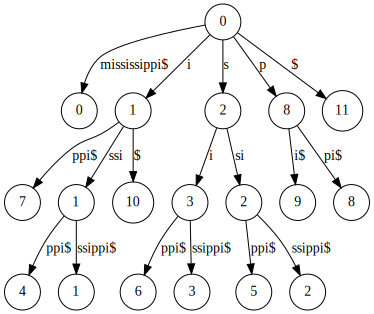

In [11]:
%dotstr stree.to_dot()

1. Construir a árvore de sufixos

2. Enumerar os nós internos com o menor valor encontrado em sua subárvore.

3. Varremos a string T em busca da substring encontrada anteriormente. Para cada i em T temos a substring a seguir, T[i:m], onde m é o tamanho da palavra.

  3.1. Seguimos o caminho na árvore de sufixo correspondente a subpalavra T[i:m] mantendo o menor valor encontrado nos nós internos percorridos (ps: o valor encontrado nas leafs não nos interessa).

  3.2. Quando o menor valor encontrado é igual ao índice da palavra, isso quer dizer que o caractere correspondente ao índice i não foi encontrado anteriormente. Output esse caractere.
  
  3.3. Quando não nos deparamos com nós internos ao longo do caminho de match, significa que tmb nao encontramos o caractere i anteriormente. Output i.
  
  3.4. Quando nos deparamos com um caminho com mais de um nó interno com mesmo valor. Output do conjunto de labels que correspondem a estes nós. Output (posicao = menor valor encontrado, tamanho da string correspondente aos nós de menor valor encontrado)
  
  3.5. Pulamos os caracteres de output e continuamos com o algoritmo até percorrer toda a string.
  
  
**Implementation details**: I dont know if the complexity time is $O(m)$ because my implementation is matching every $T[i..m]$ for all i $\in$ {0..m}. So, maybe it's complexity is growing in order $m^2$ instead of $m$. But, when I find a previous matche, i.e. a portion of the text that can be compressed, the algorithm jumps the lenght of the compressed part. This may be contributing to lower the running time.

The algorithm perform the enumeration of all internal nodes through the creation of a subtree for each internal node, and them keeps the minimum value found in a leaf belonging to the subtree. Since we have to enumerate the internal nodes from in a bottom-up fashion we first sort the nodes in pos-order. We iterate over the pos-order vector of nodes creating the subtree for each internal node found.

I've used a dictionary to keep track of numbers in the internal nodes encountered and their labels when the algorithm traverses a path from root to $p$. This code is implemented on function `followPathMod()`. This may be a naive method because we always store a dictionary with all the paths and labels and this can be a burden to very deep suffix trees. Another cavet of the implementation was already mentioned and is related to the fact that every time we traverses all the remaining string. This could be avoided contrainting the traverse to a number of characters equal to the index i of $T[i..m]$ because we can only have previous substrings of length $i$.

In [0]:
node_end, offset, lcvs = stree.followPathMod('mississippi$')

In [0]:
zs = stree.LZ76encoder('mississippi$')

In [15]:
zs

['m', 'i', 's', (2, 1), (1, 1), (2, 3), 'p', (8, 1), (1, 1), '$']

In [16]:
stree.LZ76decoder(zs)

'mississippi$'

In [0]:
stree = SuffixTreeLZ76('how_can_a_clam_cram_in_a_clean_cream_can')

In [0]:
stree.enumerate_internal_nodes2()

In [0]:
zs = stree.LZ76encoder('how_can_a_clam_cram_in_a_clean_cream_can$')

In [20]:
zs

['h',
 'o',
 'w',
 '_',
 'c',
 'a',
 'n',
 (3, 1),
 (5, 1),
 (3, 2),
 'l',
 (5, 1),
 'm',
 (3, 2),
 'r',
 (5, 1),
 (13, 2),
 'i',
 (6, 6),
 'e',
 (5, 3),
 (4, 1),
 (16, 1),
 (27, 2),
 (13, 3),
 (5, 2),
 '$']

In [21]:
stree.LZ76decoder(zs)

'how_can_a_clam_cram_in_a_clean_cream_can$'

In [22]:
! pip install ncbi-acc-download

In [0]:
! ncbi-acc-download -m nucleotide -F fasta NC_001416.1

In [24]:
! head NC_001416.1.fa

>NC_001416.1 Enterobacteria phage lambda, complete genome
GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCG
TCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGC
TTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCA
GCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTG
CGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGG
ATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCT
CCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAG
AATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTG
AAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACA


In [0]:
phage_geno = ''
with open('NC_001416.1.fa', 'r') as phagefa:
  for line in phagefa.readlines():
    if line.startswith('>'):
      continue
    else:
      phage_geno += line.strip('\n')

In [26]:
len(phage_geno)

48502

In [0]:
first_500_bp = phage_geno[:500]

In [0]:
phaST = SuffixTreeLZ76(first_500_bp)

In [0]:
phaST.enumerate_internal_nodes2()

In [0]:
first_500_bp_aug = first_500_bp+'$'

In [0]:
# %dotstr phaST.to_dot()

In [0]:
z = phaST.LZ76encoder(first_500_bp_aug)

In [33]:
phaST.LZ76decoder(z) == first_500_bp_aug

True